# Check DC2 Files

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : 2024-11-03
- last update :  2024-11-03


In [1]:
from rail.utils.path_utils import find_rail_file
import h5py
import pandas as pd
import numpy as np
import astropy
from astropy import units as u
from astropy import constants as c
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# reference flux in Jy
F0 = ((0.0 * u.ABmag).to(u.Jy)).value
F0

3630.7805477010033

## Config

In [3]:
trainFile = find_rail_file("examples_data/testdata/test_dc2_training_9816.hdf5")
testFile = find_rail_file("examples_data/testdata/test_dc2_validation_9816.hdf5")

In [4]:
# the order by which one want the data
list_of_cols = [
    "id",
    "redshift",
    "mag_u_lsst",
    "mag_g_lsst",
    "mag_r_lsst",
    "mag_i_lsst",
    "mag_z_lsst",
    "mag_y_lsst",
    "mag_err_u_lsst",
    "mag_err_g_lsst",
    "mag_err_r_lsst",
    "mag_err_i_lsst",
    "mag_err_z_lsst",
    "mag_err_y_lsst",
]
list_of_filters = ["u", "g", "r", "i", "z", "y"]
list_of_fitcolors = ["b", "g", "r", "orange", "grey", "k"]
Nf = len(list_of_filters)

## Read magnitudes file in pandas dataframe

In [5]:
def h5filetodataframe(filename, group="photometry"):
    """
    Function to convert the LSST magnitudes hdf5 file into a pandas dataFrame
    """
    data = h5py.File(filename, "r")
    list_of_keys = list(data[group].keys())
    all_data = np.array([data[group][key][:] for key in list_of_keys])
    df = pd.DataFrame(all_data.T, columns=list_of_keys)
    if "id" in list_of_keys:
        df = df.astype({"id": int})
    return df

In [6]:
df_train = h5filetodataframe(trainFile)
df_test = h5filetodataframe(testFile)

In [7]:
df_train = df_train[list_of_cols]
df_test = df_test[list_of_cols]

In [8]:
df_train

,id,redshift,mag_u_lsst,mag_g_lsst,mag_r_lsst,mag_i_lsst,mag_z_lsst,mag_y_lsst,mag_err_u_lsst,mag_err_g_lsst,mag_err_r_lsst,mag_err_i_lsst,mag_err_z_lsst,mag_err_y_lsst
0,8062500000,0.020435,18.040369,16.960892,16.653412,16.506310,16.466377,16.423904,0.005046,0.005001,0.005001,0.005001,0.005001,0.005003
1,8062500062,0.019361,21.615589,20.709402,20.533852,20.437565,20.408886,20.388210,0.009552,0.005084,0.005048,0.005075,0.005193,0.005804
2,8062500124,0.036721,21.851952,20.437067,19.709715,19.312630,18.953411,18.770441,0.011148,0.005057,0.005015,0.005016,0.005023,0.005063
3,8062500186,0.039469,19.976501,19.128675,18.803484,18.619995,18.546589,18.479452,0.005477,0.005011,0.005005,0.005007,0.005014,0.005041
4,8062500248,0.026994,22.294912,21.242783,20.911802,20.731707,20.700289,20.645004,0.015486,0.005182,0.005084,0.005118,0.005308,0.006211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,8082089097,2.919066,25.849283,25.304010,25.100941,25.183607,25.307907,25.288248,0.370108,0.047219,0.036143,0.056159,0.111270,0.251490
10221,8082665930,2.958577,25.298115,24.512877,24.345989,24.434958,24.550760,24.699463,0.223080,0.023345,0.018635,0.028602,0.055670,0.146360
10222,8082681636,2.979273,25.185795,24.114050,23.828472,23.711334,23.756241,23.834909,0.201235,0.016647,0.012279,0.015386,0.027238,0.066269
10223,8082693813,2.986947,26.682219,25.068745,24.770744,24.587885,24.786388,24.673431,0.796234,0.038190,0.026926,0.032777,0.069016,0.142901


In [9]:
df_train.isnull().values.any()

False

In [10]:
df_test

,id,redshift,mag_u_lsst,mag_g_lsst,mag_r_lsst,mag_i_lsst,mag_z_lsst,mag_y_lsst,mag_err_u_lsst,mag_err_g_lsst,mag_err_r_lsst,mag_err_i_lsst,mag_err_z_lsst,mag_err_y_lsst
0,8062500001,0.023046,21.863800,20.438414,19.755016,19.391100,19.197659,19.089836,0.011239,0.005057,0.005016,0.005017,0.005032,0.005102
1,8062500032,0.021876,21.166199,20.313864,19.992922,19.784693,19.689024,19.637985,0.007500,0.005049,0.005022,0.005029,0.005064,0.005240
2,8062500063,0.044193,20.191656,19.307367,18.982983,18.768497,18.653229,18.559248,0.005642,0.005014,0.005006,0.005008,0.005015,0.005046
3,8062500094,0.036530,19.162107,17.973402,17.471495,17.223320,17.084932,17.020369,0.005165,0.005003,0.005001,0.005001,0.005003,0.005006
4,8062500125,0.048424,18.996309,17.696873,17.063858,16.678440,16.391079,16.227520,0.005135,0.005003,0.005001,0.005001,0.005001,0.005003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20444,8082681651,2.982850,99.000000,25.688499,25.234903,25.249790,25.287374,25.258661,26.620825,0.066974,0.040779,0.059650,0.109193,0.244737
20445,8082688910,2.968549,28.152252,25.511272,25.181467,25.182558,25.162598,25.380444,3.081549,0.056991,0.038860,0.056105,0.097386,0.273752
20446,8082693855,3.021014,99.000000,24.873056,24.626976,24.693913,24.768852,25.238146,26.620825,0.032056,0.023732,0.036046,0.067920,0.240163
20447,8082700644,2.981040,25.946056,25.009001,24.709862,24.776567,24.955820,24.965181,0.404541,0.036196,0.025519,0.038829,0.080582,0.186846


In [11]:
df_test.isnull().values.any()

False

In [12]:
df_train.describe()

,id,redshift,mag_u_lsst,mag_g_lsst,mag_r_lsst,mag_i_lsst,mag_z_lsst,mag_y_lsst,mag_err_u_lsst,mag_err_g_lsst,mag_err_r_lsst,mag_err_i_lsst,mag_err_z_lsst,mag_err_y_lsst
count,1.022500e+04,10225.000000,10225.000000,10225.000000,10225.000000,10225.000000,10225.000000,10225.000000,10225.000000,10225.000000,10225.000000,10225.000000,10225.000000,10225.000000
mean,8.065022e+09,0.918046,30.650381,25.198305,24.550483,24.007670,23.685969,23.502946,2.628721,0.081137,0.033823,0.029109,0.039233,0.077921
std,2.883351e+06,0.465657,18.782331,1.670112,1.241349,1.231145,1.260258,1.290327,7.237165,0.405906,0.023975,0.017557,0.026972,0.061572
min,8.062500e+09,0.019361,18.040369,16.960892,16.443893,16.047909,15.782154,15.580867,0.005046,0.005001,0.005000,0.005000,0.005001,0.005001
25%,8.063139e+09,0.597297,24.709208,24.521471,24.012360,23.490122,23.130009,22.910746,0.130036,0.023520,0.014163,0.012911,0.015932,0.028762
50%,8.064207e+09,0.885438,25.639668,25.303179,24.872881,24.382505,24.024612,23.822680,0.305261,0.047184,0.029476,0.027304,0.034591,0.065533
75%,8.065867e+09,1.157313,26.631372,26.113134,25.410284,24.917677,24.586552,24.413250,0.759837,0.098744,0.047796,0.044109,0.057514,0.112536
max,8.082707e+09,2.986947,99.000000,99.000000,26.799158,25.299898,25.722849,26.417637,86.027245,28.322212,0.170416,0.062439,0.162880,0.711178


In [13]:
df_test.describe()

,id,redshift,mag_u_lsst,mag_g_lsst,mag_r_lsst,mag_i_lsst,mag_z_lsst,mag_y_lsst,mag_err_u_lsst,mag_err_g_lsst,mag_err_r_lsst,mag_err_i_lsst,mag_err_z_lsst,mag_err_y_lsst
count,2.044900e+04,20449.000000,20449.000000,20449.000000,20449.000000,20449.000000,20449.000000,20449.000000,20449.000000,20449.000000,20449.000000,20449.000000,20449.000000,20449.000000
mean,8.065022e+09,0.918080,30.869628,25.186843,24.554401,24.012341,23.690379,23.505952,2.723133,0.076946,0.033898,0.029095,0.039094,0.077415
std,2.881701e+06,0.465651,19.147229,1.315379,1.233118,1.219137,1.245701,1.273725,7.378871,0.172058,0.024188,0.017570,0.026704,0.060837
min,8.062500e+09,0.021876,17.811508,16.236837,15.477545,15.103028,14.877973,14.700274,0.005036,0.005001,0.005000,0.005000,0.005000,0.005001
25%,8.063139e+09,0.597661,24.707216,24.513966,23.988621,23.484299,23.124420,22.901054,0.129800,0.023367,0.013899,0.012853,0.015859,0.028516
50%,8.064207e+09,0.884316,25.640535,25.301073,24.872551,24.379198,24.028570,23.821346,0.305505,0.047094,0.029467,0.027224,0.034714,0.065453
75%,8.065867e+09,1.156890,26.681490,26.118149,25.405602,24.916990,24.581272,24.407089,0.795701,0.099198,0.047594,0.044082,0.057239,0.111902
max,8.082707e+09,3.026069,99.000000,31.780725,26.957701,25.299910,25.715441,27.094608,78.206169,18.186451,0.197158,0.062440,0.161775,1.326487


## Convert 

In [14]:
def CheckBadFluxes(fl, dfl, mag, dmag, maxmag=30.0):
     """
    Interpolate fluxes as ther are missing
    Parameters:
       fl : array of fluxes
       dfl : array of flux error
       mag : array of magnitudes
       dmag: array on magnitude errors
       maxmag: max magnitude 
    Return : 
       the arrays of fluxes and flux error corrected for mission values
    """
    indexes_bad = np.where(mag > maxmag)[0]
    indexes_good = np.where(mag < maxmag)[0]

    if len(indexes_bad) > 0:
        for idx in indexes_bad:
            # in band g,r,i,z
            if idx > 0 and idx < Nf - 1:
                # have two good neighbourgs
                if idx - 1 in indexes_good and idx + 1 in indexes_good:
                    fl[idx] = np.mean([fl[idx - 1], fl[idx + 1]])
                    dfl[idx] = np.max([dfl[idx - 1], dfl[idx + 1]]) * 5.0
                elif idx - 1 in indexes_good:
                    fl[idx] = fl[idx - 1]
                    dfl[idx] = dfl[idx - 1] * 10.0
                elif idx + 1 in indexes_good:
                    fl[idx] = fl[idx + 1]
                    dfl[idx] = dfl[idx + 1] * 10.0
                else:
                    fl[idx] = np.mean(fl[indexes_good])
                    dfl[idx] = np.max(fl[indexes_good]) * 100.0
            elif idx == 0:
                if idx + 1 in indexes_good:
                    fl[idx] = fl[idx + 1]
                    dfl[idx] = dfl[idx + 1] * 10.0
                else:
                    fl[idx] = np.mean(fl[indexes_good])
                    dfl[idx] = np.max(fl[indexes_good]) * 100.0
            elif idx == Nf - 1:
                if idx - 1 in indexes_good:
                    fl[idx] = fl[idx - 1]
                    dfl[idx] = dfl[idx - 1] * 10.0
                else:
                    fl[idx] = np.mean(fl[indexes_good])
                    dfl[idx] = np.max(fl[indexes_good]) * 100.0

    return fl, dfl

In [15]:
def convert_to_ABflux(row):
    """
    Convert AB magnitudes into FAB flux (units AB, that is per 3631 Jy
    This function is dedicated to be applied to a pandas dataframe containing magnitudes and magnitudes error
    Parameters:
      row : one row of the pandas dataframe
    Returns:
      the pandas series of flux and flux error corrected for missing values by usingthe CheckBadFluxes 
    """

    fl = np.zeros(Nf)
    dfl = np.zeros(Nf)
    mag = np.zeros(Nf)
    dmag = np.zeros(Nf)
    all_fname = []
    all_ferrname = []

    for idx, band in enumerate(list_of_filters):
        mag_label = f"mag_{band}_lsst"
        magerr_label = f"mag_err_{band}_lsst"
        flux_label = f"fab_{band}_lsst"
        fluxerr_label = f"fab_err_{band}_lsst"
        m = row[mag_label]
        dm = row[magerr_label]
        f = np.power(10.0, -0.4 * m)
        df = np.log(10.0) / 2.5 * f * dm
        fl[idx] = f
        mag[idx] = m
        dfl[idx] = df
        dmag[idx] = dm
        all_fname.append(flux_label)
        all_ferrname.append(fluxerr_label)

    # decide what to do if one magnitude is too high
    fl, dfl = CheckBadFluxes(fl, dfl, mag, dmag)
    column_names = all_fname + all_ferrname
    data = np.concatenate((fl, dfl))
    return pd.Series(data, index=column_names)

In [16]:
df_train_fl = df_train.apply(convert_to_ABflux, axis=1)

In [17]:
df_test_fl = df_test.apply(convert_to_ABflux, axis=1)

In [18]:
df_train_fl.isnull().values.any()

False

In [19]:
df_test_fl.isnull().values.any()

False

In [20]:
flux_col = [f"fab_{band}_lsst" for band in list_of_filters]
eflux_col = [f"fab_err_{band}_lsst" for band in list_of_filters]

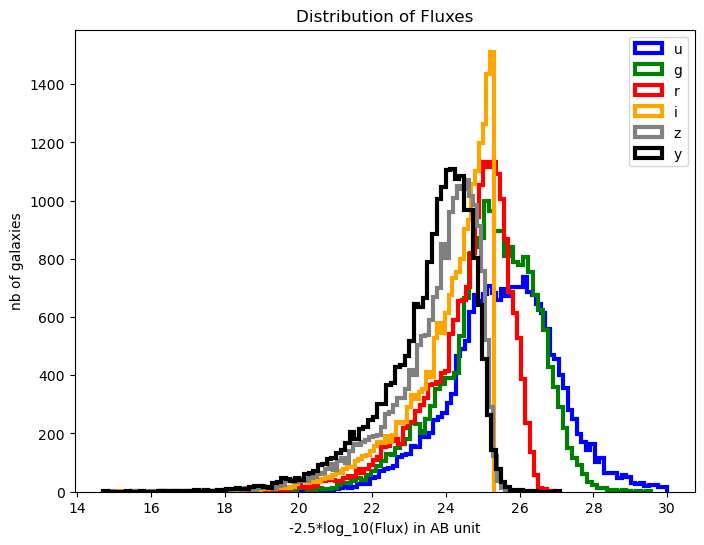

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for ifilt in range(Nf):
    tag = flux_col[ifilt]
    xval = -2.5 * np.log10(df_test_fl[tag])
    legname = list_of_filters[ifilt]
    ax.hist(xval, bins=100, histtype="step", lw=3, color=list_of_fitcolors[ifilt], label=legname)
ax.set_xlabel("-2.5*log_10(Flux) in AB unit")
ax.set_ylabel("nb of galaxies")
ax.set_title("Distribution of Fluxes")
ax.legend(loc="upper right")

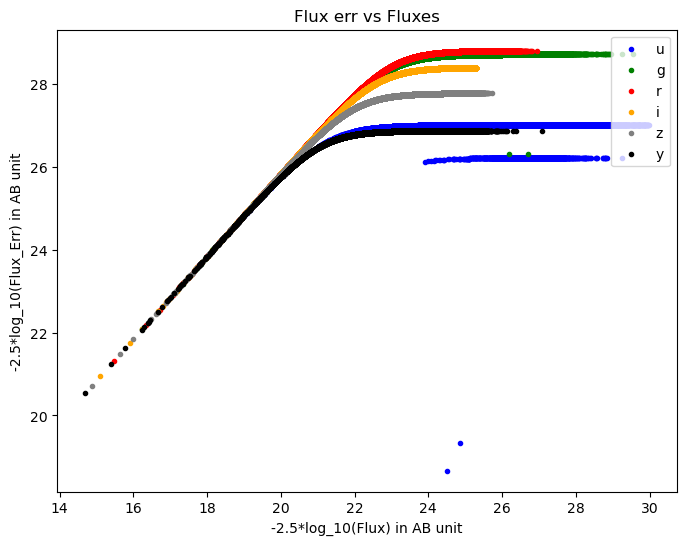

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for ifilt in range(Nf):
    tag = flux_col[ifilt]
    etag = eflux_col[ifilt]
    xval = -2.5 * np.log10(df_test_fl[tag])
    yval = -2.5 * np.log10(df_test_fl[etag])
    legname = list_of_filters[ifilt]
    plt.scatter(xval, yval, marker=".", color=list_of_fitcolors[ifilt], label=legname)
ax.set_xlabel("-2.5*log_10(Flux) in AB unit")
ax.set_ylabel("-2.5*log_10(Flux_Err) in AB unit")
ax.set_title("Flux err vs Fluxes")
ax.legend(loc="upper right")